<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/DL/08_3_CNN_Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN 시각화

[<Conv2D name=conv2d_20, built=True>, <MaxPooling2D name=max_pooling2d_19, built=True>, <Conv2D name=conv2d_21, built=True>, <MaxPooling2D name=max_pooling2d_20, built=True>, <Flatten name=flatten_7, built=True>, <Dense name=dense_13, built=True>, <Dropout name=dropout_7, built=True>, <Dense name=dense_14, built=True>]

(3, 3, 1, 32) (32,)
-0.036091734 0.2762617


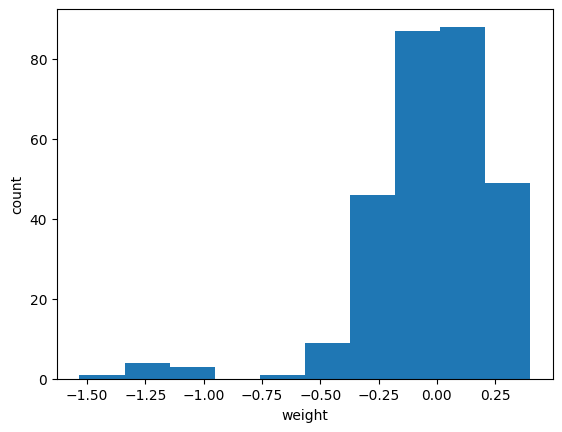

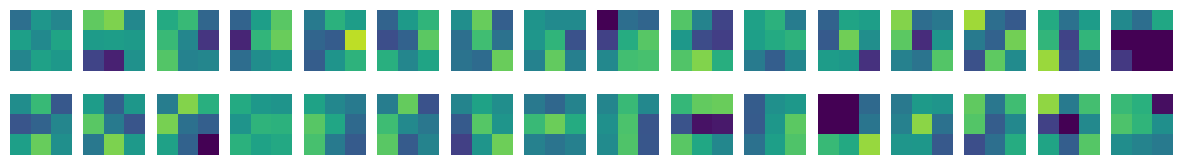

In [6]:
import keras
import matplotlib.pyplot as plt

# 이전에 학습한 모델 가져오기
model = keras.models.load_model('sample_data/best-cnn-model.keras')


# 모델에 추가한 층 출력
print(model.layers)
print()

# 첫 번째 층
conv= model.layers[0]
# weights->층의 가중치와 절편, [0]=가중치, [1]=절편
# layers는 .weights, .input, .output모두 존재
print(conv.weights[0].shape, conv.weights[1].shape)

# .numpy -> 숫자 꺼내오기
conv_weights = conv.weights[0].numpy()
# 가중치 배열의 평균과 표준편차 출력
print(conv_weights.mean(), conv_weights.std())
#가중치 분포 히스토그램화
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 커널 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    # 높이,너비, 입력 채널, 필터 번호
    # vmin,vmax=픽셀의 강도 범위 지정
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

## 학습하지 않은 모델 생성

(3, 3, 1, 32)
0.0035384106 0.08347493


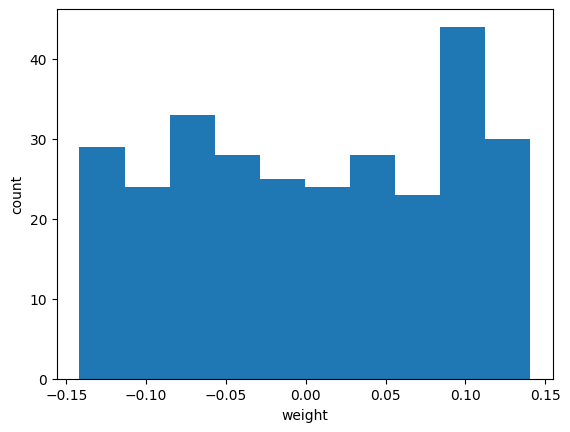

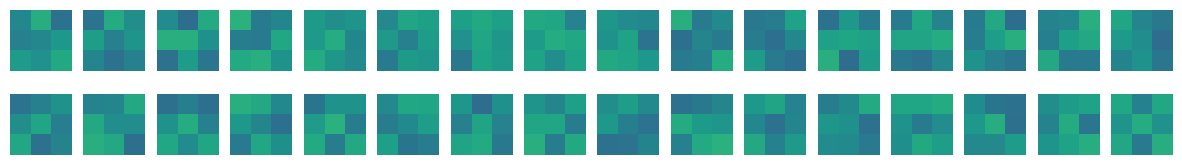

In [7]:
# 위 모델과 비교 위해 학습하지 않은 모델 생성
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', strides=1))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

# 가중치 평균, 표준편차 확인, 평균은 0에 가까우나 표준편차가 너무 낮음
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

#히스토그램화
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 커널 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()
#출력 결과 -> 밋밋함->아직or i in range(2):

## 함수형 API
지금까지 사용한 Sequential 클래스는 층을 차례대로 쌓은 모델을 만듬.
입력,출력이 여러 개인 복잡한 모델은 함수형API를 사용함

모델을 자르는데 쓸 수 있음



[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=input_layer_8>]


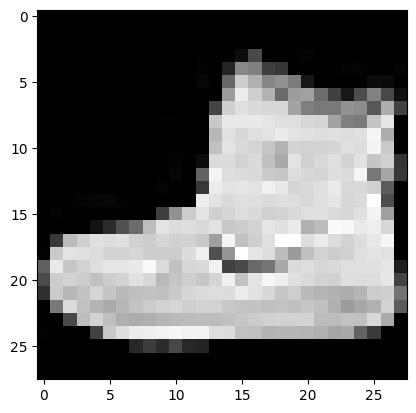

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
(1, 28, 28, 32)


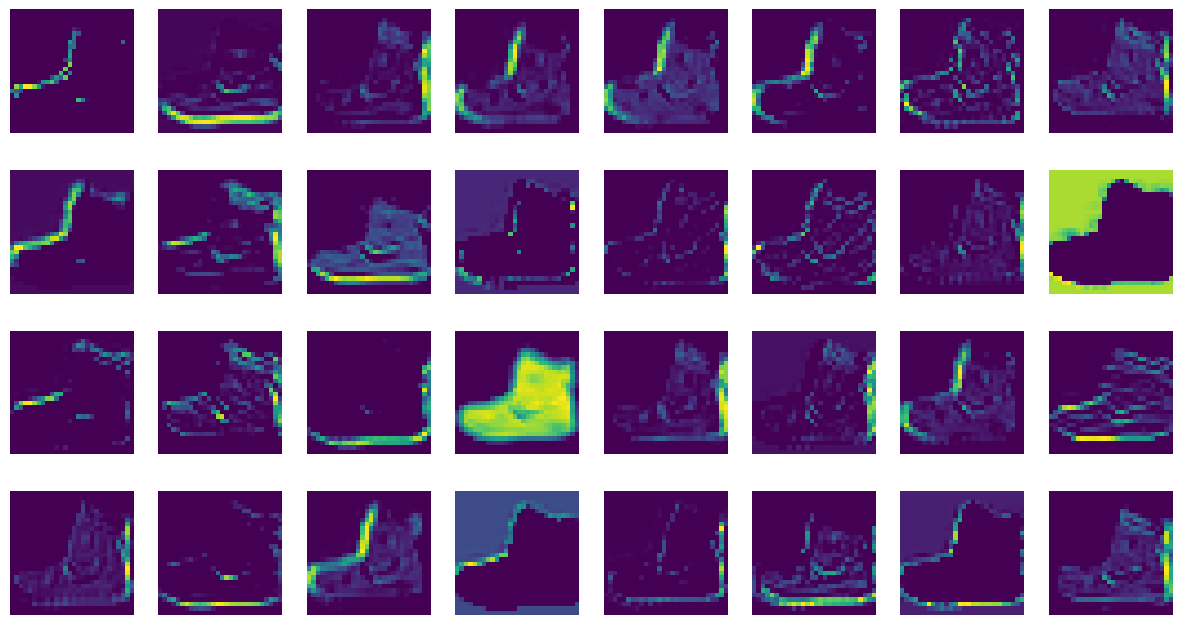

In [10]:
# 앞과 동일, but 계산 없이 정의(설계도)만 해둔 상태
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

### 중요 ###
# 입력값inputs을 dense1에 통과시킨 후 출력값 hidden을 만듬(결과 텐서), 함수 호출 형식
hidden = dense1(inputs)
# hidden에서 나온걸 dense2로 전달
outputs = dense2(hidden)
# 입력과 출력을 지정하여 모델로 정의(inputs에서 outputs까지 이어지는 흐름을 모델로 정의)
# 중간에 다양한 형태로 층 연결 가능(여러 입력,분기)
func_model = keras.Model(inputs, outputs)


### 첫번째 층 통과 후 필터 맵 출력하###

#모델의 입력을 참조
print(model.inputs)
# 모델의 일부 자르기, model.inputs[0]-> 모델의 첫번째 입력, model.layers[0].output -> 첫번째 층의 출력()
conv_acti = keras.Model(model.inputs[0], model.layers[0].output)

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray')
plt.show()

# [0:1] ->(1, 28, 28) 배치 차원 유지, [0] ->(28,28)
# reshape(-1, 28, 28,1) ->채널 정보 추가 (1, 28, 28, 1)
ankle_boot = train_input[0:1].reshape(-1, 28, 28,1)/255.0
# 여기서 predict은 모델에 데이터를 통과 시켜서 출력값을 계산(activation까지 적용)
feature_maps = conv_acti.predict(ankle_boot)
# (배치 크기 ,높이, 너비, 필터 개수)
print(feature_maps.shape)

# 첫ㅂ번s.shape)

# 첫 번째 층 통과 후 feature_map 출력
# 위에 커널 출력한거랑 비교해보셈(필터에서 밝은 값이 큰 양수 가중치)
fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
      axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
      axs[i,j].axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
(1, 14, 14, 64)


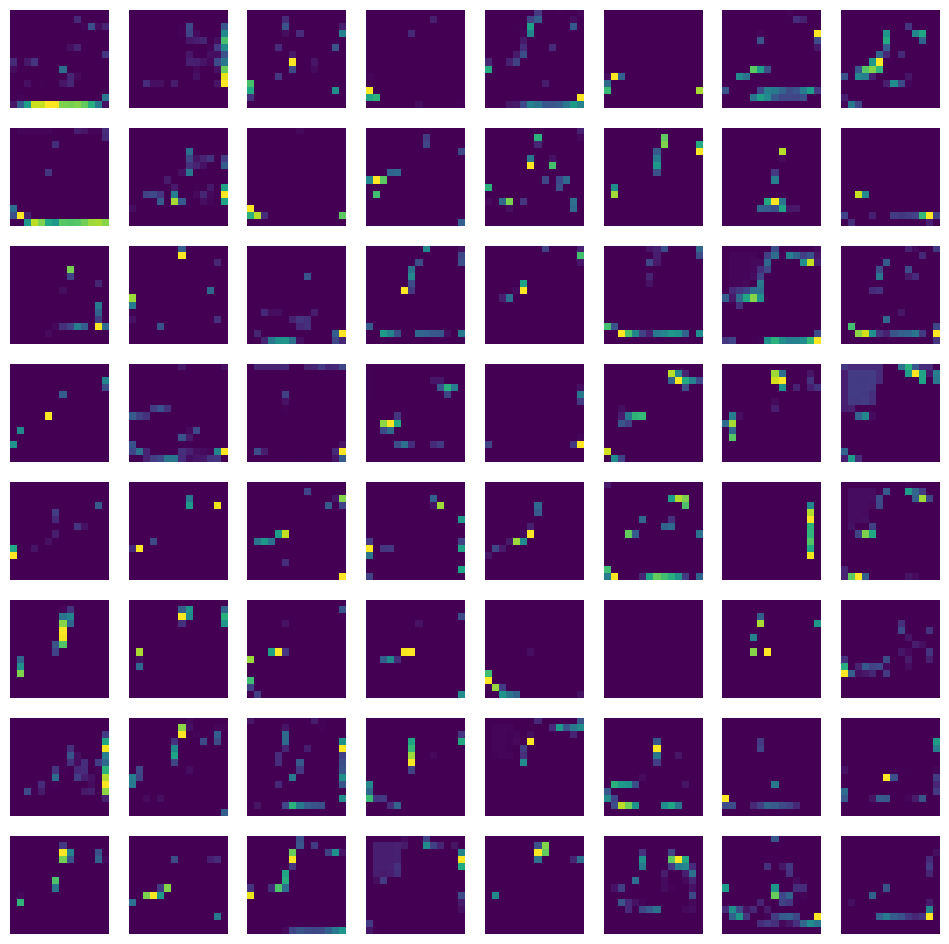

In [12]:
# 두 번째 합성곱 층이 만든 특성 맵 출력
#
conv2_acti = keras.Model(model.inputs[0], model.layers[2].output)
feature_maps = conv2_acti.predict(ankle_boot)

print(feature_maps.shape)

fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:, i*8+j])
    axs[i,j].axis('off')
plt.show()